In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import import_ipynb
import pylab as pl

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)

def process_csv(df):
    p = df['P']
    y_true = df['Y']
    y_hat = df['y_hat']
    y_compas = df['decile_score']
    features = df[df.columns.difference(['P', 'Y', 'y_hat', 'decile_score', 'unnamed'])]
    features = StandardScaler().fit_transform(features)
    pComponents = pca.fit_transform(features)
    components_orig = pd.DataFrame(data=pComponents, columns=["pc1", "pc2"])
    
    return p, y_true, y_hat, y_compas, features, components_orig

In [3]:
# features_plus_p = df[df.columns.difference(['y_hat','Y'])]
# features_plus_p = StandardScaler().fit_transform(features_plus_p)
# fppComp = pca.fit_transform(features_plus_p)
# pdffp = pd.DataFrame(data=fppComp, columns=["pc1", "pc2"])

In [4]:
p, y_true, y_ours, y_compas, features, components_orig = process_csv(pd.read_csv("compas_preds_NFR.csv"))

/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
_, _, y_ae, _, _, _ = process_csv(pd.read_csv("compas_preds_AE.csv"))

/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
_, _, y_aep, _, _, _ = process_csv(pd.read_csv("compas_preds_AE_P.csv"))

/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
_, _, y_logreg, _, _, _ = process_csv(pd.read_csv("compas_preds_Original.csv"))

/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
_, _, y_logreg_p, _, _, _ = process_csv(pd.read_csv("compas_preds_Original-P.csv"))

/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Harshita/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
y_compas = y_compas / 10.00

In [10]:
y_compas.max()

1.0

In [11]:
def visualize_data(df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(df['pc1'], df['pc2'], marker=".")
    ax.set(xlim=(0, 10), ylim=(0, 10))
    ax.grid()

In [12]:
def generate_graph(pDf, p_cat, outcome_cat):
    
    pDf['p'] = p_cat
    pDf['outcome'] = outcome_cat
    
#     finalDf = pd.concat(pd.concat([pDf, p_cat], axis = 1), outcome_cat, axis=1)
    
    
#     ax.set_xlabel('Principal Component 1', fontsize = 15)
#     ax.set_ylabel('Principal Component 2', fontsize = 15)
#     ax.set_title('2 component PCA', fontsize = 20)
    
    outcomes = [0, 1]
    races = [0, 1]
    shapes = ['.', '1']
    colors = ['g', 'b']
    for race, color in zip(races, colors):
        fig = plt.figure(figsize = (8,4))
        for outcome, shape in zip(outcomes, shapes):
            ax = fig.add_subplot(1,2,outcome+1) 
            ax.set(xlim=(-4, 4), ylim=(-4, 4))
            indicesToKeep = abs(outcome - pDf['outcome']) < 0.500000001
            indicesToKeep = indicesToKeep & (pDf['p'] == race)
            ax.scatter(pDf.loc[indicesToKeep, 'pc1']
                       , pDf.loc[indicesToKeep, 'pc2']
                       , c = color
                       , s = 50, marker=shape)
            ax.grid()

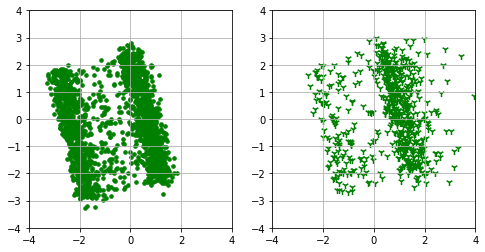

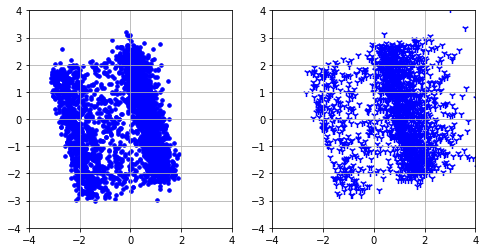

In [13]:
generate_graph(components_orig, p, y_ours)

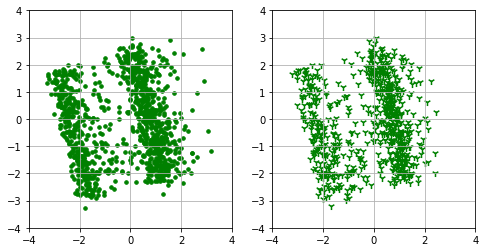

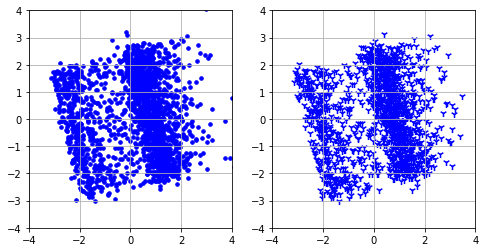

In [14]:
generate_graph(components_orig, p, y_compas)

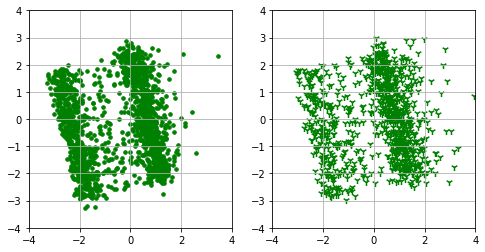

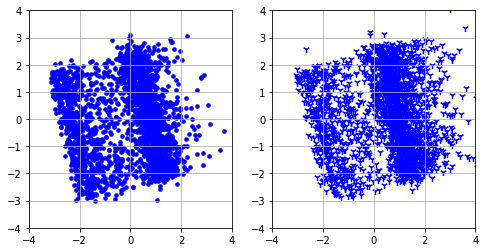

In [15]:
generate_graph(components_orig, p, y_true)

In [34]:
def racial_comparison(p, y):
    col_name = y.name
    p_name = p.name
    print(col_name)
    df = pd.concat([p, y], axis=1)
    plt.figure()
    df[df[p_name] == 0][col_name].hist()
    pl.suptitle("Distribution of predictions for race 0")
    plt.figure()
    df[df[p_name] == 1][col_name].hist()
    pl.suptitle("Distribution of predictions for race 1")

decile_score


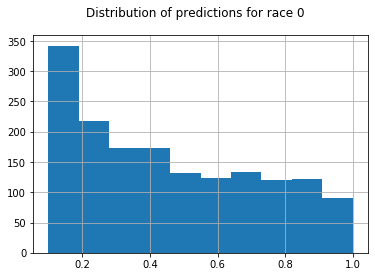

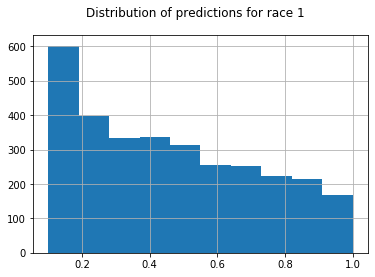

In [35]:
racial_comparison(p, y_compas)